<a href="https://colab.research.google.com/github/ahmedkhalid-01/Artificial-Intelligence/blob/main/lab10(200148).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='left' >AIR UNIVERSITY</h1>
<h1 align='left' >Department of Electrical and Computer Engineering</h1>
<h1 align='left' >AI for Engineers Lab</h1>
<h1 align='left' >Lab #10: Vectorized Linear Regression</h1>
<h2 align='left' >Student Name: Ahmed Khalid</h2>
<h2 align='left' >Roll No: 200148</h2>
<h2 align='left' >Instructor: M Awais Manzoor </h2>

# Vectorized Linear Regression

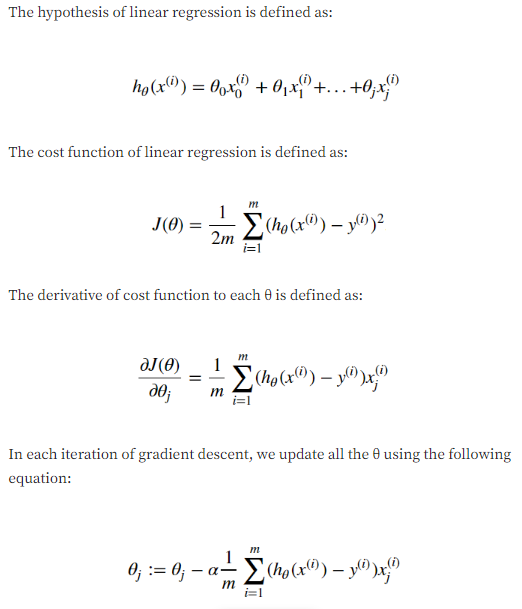

In [ ]:
from IPython import display
display.Image("VLR.PNG")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Univariate

In [4]:
data = pd.read_csv('ex1data1.txt', sep=",", header=None)       #store the given data in pandas data frame
data.columns = ["population", "profit"]         #data loaded in "population" and "profit" variable
data.head(5)            #checking if the data is loaded correctly

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


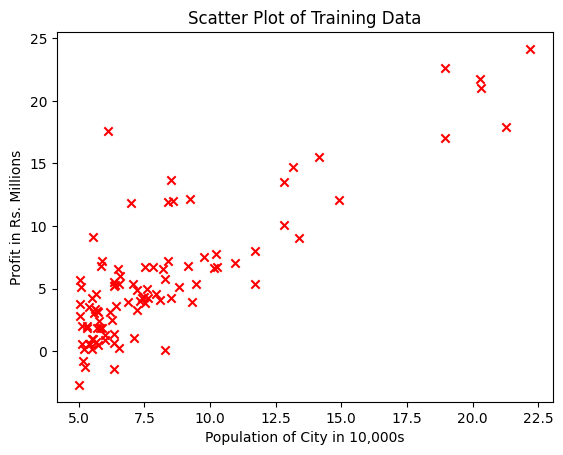

In [5]:
plt.title("Scatter Plot of Training Data")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in Rs. Millions")
plt.scatter(data.population,data.profit, color ='red', marker='x')  #Plotting the data

In [6]:
# Extract X and y
X = data[['population']].values  # Feature matrix
y = data['profit'].values.reshape(-1, 1)  # Target variable

print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (97, 1)
y shape: (97, 1)


In [7]:
# Add a column of ones to X to account for the bias term
X_with_bias = np.hstack((np.ones((X.shape[0], 1)), X))

print(X_with_bias[:, :])

[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

In [8]:
# Initialize Theta (parameters)
theta = np.random.rand(2, 1)
print(f'Theta shape: {theta.shape}')
print('Initial Theta:', theta)

Theta shape: (2, 1)
Initial Theta: [[0.15848366]
 [0.42076001]]


### Hypothesis

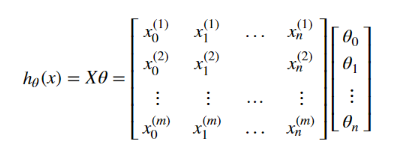

In [12]:
from IPython import display
display.Image("hypothesis.png")

### Hypothesis

In [14]:
# Compute the hypothesis
hypothesis = np.dot(X_with_bias, theta)
print(f'Hypothesis shape: {hypothesis.shape}')
print('Hypothesis:')
print(hypothesis[:, :])

Hypothesis shape: (97, 1)
Hypothesis:
[[2.72936938]
 [2.48431875]
 [3.74276985]
 [3.10515014]
 [2.62405315]
 [3.68567272]
 [3.30425377]
 [3.76780507]
 [2.88761721]
 [2.28525719]
 [2.56131783]
 [6.11812839]
 [2.57112154]
 [3.6964021 ]
 [2.53186463]
 [2.42192004]
 [2.8367894 ]
 [2.31702457]
 [2.8638022 ]
 [3.13359351]
 [2.76260942]
 [8.68728899]
 [2.46849817]
 [2.82025354]
 [2.49997102]
 [8.12978198]
 [5.55599302]
 [4.76875105]
 [5.7024175 ]
 [9.50061808]
 [2.36848352]
 [2.93103965]
 [4.04975635]
 [2.63751747]
 [3.61338615]
 [3.49654109]
 [3.5649146 ]
 [2.51739048]
 [5.5593591 ]
 [2.83174028]
 [2.43349094]
 [3.0543644 ]
 [5.08474181]
 [2.58782571]
 [3.45080448]
 [3.14297646]
 [2.29182104]
 [2.59948076]
 [5.08137573]
 [2.49016731]
 [3.33109826]
 [2.39175155]
 [3.28216387]
 [3.35756406]
 [2.82307263]
 [2.83405446]
 [2.79841609]
 [2.53144387]
 [4.07584347]
 [4.13618046]
 [3.87185902]
 [2.33772596]
 [9.11183583]
 [6.43117383]
 [8.13567262]
 [3.19561354]
 [3.64872999]
 [4.46538309]
 [2.472411

### Cost Function

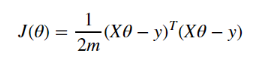

In [ ]:
from IPython import display
display.Image("cost.PNG")

In [15]:
# Implement Cost Function
def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    hypothesis = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum((hypothesis - y) ** 2)
    return cost

# Compute initial cost
initial_cost = compute_cost(X_with_bias, y, theta)
print(f'Initial Cost: {initial_cost}')

Initial Cost: 11.422078030974793


### Cost Function Derivative and Update Theta

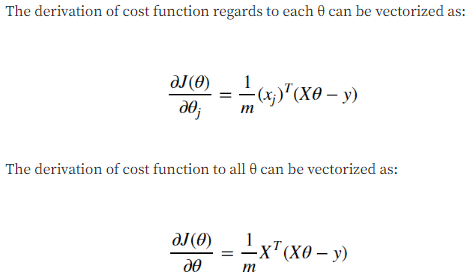

In [ ]:
from IPython import display
display.Image("update theta.PNG")

In [16]:
# Gradient Descent Function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        gradient = np.dot(X.T, loss) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        print(f'theta1: {theta[1]}, theta0: {theta[0]}, cost: {cost}, iteration: {i}')
    return theta

In [17]:
# Set learning rate and number of iterations
alpha = 0.01
iterations = 1000

# Perform Gradient Descent
theta = gradient_descent(X_with_bias, y, theta, alpha, iterations)
print('Theta after gradient descent:', theta)

# Compute final cost
final_cost = compute_cost(X_with_bias, y, theta)
print(f'Final Cost: {final_cost}')

theta1: [0.71860132], theta0: [0.180957], cost: 6.1661476304677585, iteration: 0
theta1: [0.77215428], theta0: [0.17890235], cost: 5.994767756415983, iteration: 1
theta1: [0.78228067], theta0: [0.17249843], cost: 5.984077444146584, iteration: 2
theta1: [0.78468633], theta0: [0.16533226], cost: 5.978483880206576, iteration: 3
theta1: [0.78571843], theta0: [0.15804145], cost: 5.973070303126088, iteration: 4
theta1: [0.78650528], theta0: [0.15073934], cost: 5.967681276314485, iteration: 5
theta1: [0.78724744], theta0: [0.14344604], cost: 5.9623118200728715, iteration: 6
theta1: [0.78798057], theta0: [0.13616511], cost: 5.956961709346295, iteration: 7
theta1: [0.78871101], theta0: [0.12889717], cost: 5.95163086956918, iteration: 8
theta1: [0.7894399], theta0: [0.12164231], cost: 5.946319231174339, iteration: 9
theta1: [0.79016742], theta0: [0.11440052], cost: 5.941026724994626, iteration: 10
theta1: [0.79089363], theta0: [0.10717178], cost: 5.935753282116751, iteration: 11
theta1: [0.79161

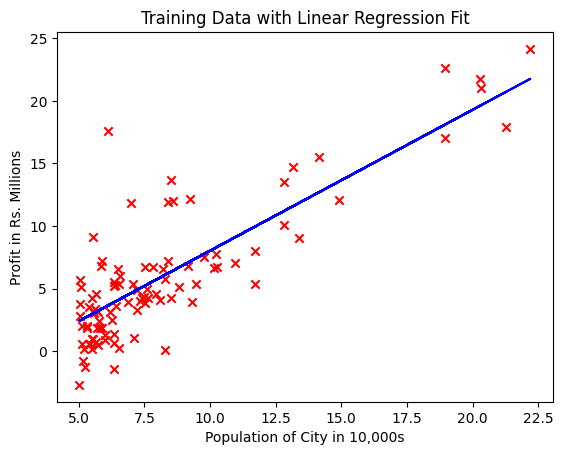

In [18]:
# Plot the scatter plot with the fitted regression line
plt.scatter(data.population, data.profit, color='red', marker='x')
plt.title("Training Data with Linear Regression Fit")
plt.xlabel("Population of City in 10,000s")
plt.ylabel("Profit in Rs. Millions")
plt.plot(data.population, X_with_bias.dot(theta), color='blue')
plt.show()

## Multivariate

In [43]:
'''
ToDo: Repeat the same steps for multivariate case, add same headings as above
      use the providedex1data2.txt dataset
'''

data = pd.read_csv('ex1data2.txt', sep=",", header=None)       #store the given data in pandas data frame
data.columns = ["X1", "X2", "Y"]         #data loaded in "population" and "profit" variable
data.head(5)            #checking if the data is loaded correctly

,X1,X2,Y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [44]:
# Data Extraction
X1 = data['X1'].values.reshape(-1, 1)
X2 = data['X2'].values.reshape(-1, 1)
Y = data['Y'].values.reshape(-1, 1)

print(X1.shape)
print(X2.shape)
print(Y.shape)

(47, 1)
(47, 1)
(47, 1)


In [45]:
# Stack Features
X_with_bias = np.hstack((np.ones((X1.shape[0], 1)), X1, X2))
print(X_with_bias.shape)
print(X_with_bias[:, :])

(47, 3)
[[1.000e+00 2.104e+03 3.000e+00]
 [1.000e+00 1.600e+03 3.000e+00]
 [1.000e+00 2.400e+03 3.000e+00]
 [1.000e+00 1.416e+03 2.000e+00]
 [1.000e+00 3.000e+03 4.000e+00]
 [1.000e+00 1.985e+03 4.000e+00]
 [1.000e+00 1.534e+03 3.000e+00]
 [1.000e+00 1.427e+03 3.000e+00]
 [1.000e+00 1.380e+03 3.000e+00]
 [1.000e+00 1.494e+03 3.000e+00]
 [1.000e+00 1.940e+03 4.000e+00]
 [1.000e+00 2.000e+03 3.000e+00]
 [1.000e+00 1.890e+03 3.000e+00]
 [1.000e+00 4.478e+03 5.000e+00]
 [1.000e+00 1.268e+03 3.000e+00]
 [1.000e+00 2.300e+03 4.000e+00]
 [1.000e+00 1.320e+03 2.000e+00]
 [1.000e+00 1.236e+03 3.000e+00]
 [1.000e+00 2.609e+03 4.000e+00]
 [1.000e+00 3.031e+03 4.000e+00]
 [1.000e+00 1.767e+03 3.000e+00]
 [1.000e+00 1.888e+03 2.000e+00]
 [1.000e+00 1.604e+03 3.000e+00]
 [1.000e+00 1.962e+03 4.000e+00]
 [1.000e+00 3.890e+03 3.000e+00]
 [1.000e+00 1.100e+03 3.000e+00]
 [1.000e+00 1.458e+03 3.000e+00]
 [1.000e+00 2.526e+03 3.000e+00]
 [1.000e+00 2.200e+03 3.000e+00]
 [1.000e+00 2.637e+03 3.000e+00]
 [

In [46]:
# Initialize Theta (parameters)
theta = np.random.rand(X_with_bias.shape[1], 1)
print('Initial Theta:', theta)

Initial Theta: [[0.64931045]
 [0.48080006]
 [0.2658947 ]]


In [47]:
# Compute hypothesis
hypothesis = np.dot(X_with_bias, theta)
print('Hypothesis shape:', hypothesis.shape)
print('Hypothesis:', hypothesis)

Hypothesis shape: (47, 1)
Hypothesis: [[1013.05032245]
 [ 770.72709181]
 [1155.36714045]
 [ 681.99398593]
 [1444.11307163]
 [ 956.10100992]
 [ 738.9942878 ]
 [ 687.54868129]
 [ 664.95107844]
 [ 719.76228537]
 [ 934.46500718]
 [ 963.04711613]
 [ 910.15910944]
 [2155.00145618]
 [ 611.10147163]
 [1107.55302907]
 [ 635.83718009]
 [ 595.71586968]
 [1256.12024785]
 [1459.01787351]
 [ 851.02070197]
 [ 908.93161463]
 [ 772.65029206]
 [ 945.04260852]
 [1871.75923104]
 [ 530.32706141]
 [ 702.45348318]
 [1215.94794811]
 [1059.20712829]
 [1269.31675486]
 [ 885.37241165]
 [ 481.71526594]
 [ 982.54501326]
 [1509.71678526]
 [ 872.44179934]
 [ 692.3566819 ]
 [ 597.15826986]
 [1026.77861885]
 [2028.28514549]
 [1041.20262068]
 [ 801.23240101]
 [1077.4775306 ]
 [1235.9266453 ]
 [ 578.40706749]
 [ 410.82275164]
 [ 892.15460183]
 [ 579.84946768]]


In [48]:
# Implement Cost Function
def compute_cost(X, y, theta):
    m = len(y)  # Number of training examples
    hypothesis = np.dot(X, theta)
    cost = (1 / (2 * m)) * np.sum((hypothesis - y) ** 2)
    return cost

In [49]:
# Gradient Descent Function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        hypothesis = np.dot(X, theta)
        loss = hypothesis - y
        gradient = np.dot(X.T, loss) / m
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        print(f'Iteration {i}: Theta {theta.flatten()}, Cost {cost}')
    return theta

In [50]:
# Set learning rate and number of iterations
alpha = 0.01
iterations = 30

# Perform Gradient Descent
theta = gradient_descent(X_with_bias, Y, theta, alpha, iterations)

Iteration 0: Theta [3.39514171e+03 7.61984403e+06 1.11718054e+04], Cost 1.3414241044571532e+20
Iteration 1: Theta [-1.52442349e+08 -3.52086233e+11 -5.08528930e+08], Cost 2.8641176229397362e+29
Iteration 2: Theta [7.04398704e+12 1.62690208e+16 2.34978604e+13], Cost 6.115269384919868e+38
Iteration 3: Theta [-3.25484956e+17 -7.51750606e+20 -1.08577713e+18], Cost 1.3056907771739608e+48
Iteration 4: Theta [1.50398426e+22 3.47365081e+25 5.01710352e+22], Cost 2.7878222499914964e+57
Iteration 5: Theta [-6.94953367e+26 -1.60508683e+30 -2.31827757e+27], Cost 5.952368687453915e+66
Iteration 6: Theta [3.21120503e+31 7.41670324e+34 1.07121786e+32], Cost 1.2709093268586225e+76
Iteration 7: Theta [-1.48381722e+36 -3.42707236e+39 -4.94982879e+36], Cost 2.7135592600315432e+85
Iteration 8: Theta [6.85634684e+40 1.58356409e+44 2.28719161e+41], Cost 5.793807396081881e+94
Iteration 9: Theta [-3.16814573e+45 -7.31725209e+48 -1.05685382e+46], Cost 1.237054397054256e+104
Iteration 10: Theta [1.46392060e+50 3.

<ipython-input-48-ad0d183eabf9>:5: RuntimeWarning: overflow encountered in square
  cost = (1 / (2 * m)) * np.sum((hypothesis - y) ** 2)
<ipython-input-49-612c3e44c52d>:8: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha * gradient


Iteration 281: Theta [nan nan nan], Cost nan
Iteration 282: Theta [nan nan nan], Cost nan
Iteration 283: Theta [nan nan nan], Cost nan
Iteration 284: Theta [nan nan nan], Cost nan
Iteration 285: Theta [nan nan nan], Cost nan
Iteration 286: Theta [nan nan nan], Cost nan
Iteration 287: Theta [nan nan nan], Cost nan
Iteration 288: Theta [nan nan nan], Cost nan
Iteration 289: Theta [nan nan nan], Cost nan
Iteration 290: Theta [nan nan nan], Cost nan
Iteration 291: Theta [nan nan nan], Cost nan
Iteration 292: Theta [nan nan nan], Cost nan
Iteration 293: Theta [nan nan nan], Cost nan
Iteration 294: Theta [nan nan nan], Cost nan
Iteration 295: Theta [nan nan nan], Cost nan
Iteration 296: Theta [nan nan nan], Cost nan
Iteration 297: Theta [nan nan nan], Cost nan
Iteration 298: Theta [nan nan nan], Cost nan
Iteration 299: Theta [nan nan nan], Cost nan
Iteration 300: Theta [nan nan nan], Cost nan
Iteration 301: Theta [nan nan nan], Cost nan
Iteration 302: Theta [nan nan nan], Cost nan
Iteration 

# Conclusion:

In this lab, we explored linear regression, a fundamental technique in machine learning used for predicting continuous target variables. We implemented both single-variable and multivariable linear regression using gradient descent optimization. Here are the key takeaways from the lab:

1. **Linear Regression:**
   - Linear regression is a supervised learning algorithm used for modeling the relationship between a dependent variable (target) and one or more independent variables (features).
   - It assumes a linear relationship between the input features and the target variable.

2. **Gradient Descent:**
   - Gradient descent is an optimization algorithm used to minimize the cost function by iteratively adjusting the parameters (theta) of the model.
   - It works by taking steps in the direction of the steepest decrease of the cost function.

3. **Implementation:**
   - We implemented linear regression from scratch using Python and NumPy.
   - For both single-variable and multivariable cases, we initialized random parameters and updated them using gradient descent to minimize the cost function.

4. **Prediction:**
   - After training the model, we can make predictions on new data using the learned parameters.
   - For single-variable regression, we predict the target variable based on a single input feature.
   - For multivariable regression, we predict the target variable based on multiple input features.

5. **Next Steps:**
   - In practice, linear regression serves as a baseline model for more complex algorithms.
   - Further improvements can be made by exploring feature engineering, regularization techniques, and evaluating model performance metrics.

By understanding and implementing linear regression, we gain insights into foundational concepts of machine learning and pave the way for building more advanced models in the future.